In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


In [4]:
df = pd.read_csv("../input/insurance/insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Veri seti hakkında genel bilgi
df.info()

# Sayısal sütunlar için istatistiksel özet
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
print("Kategorik Sütunlar:")
print(df.select_dtypes(include='object').columns.tolist())

print("Sayısal Sütunlar:")
print(df.select_dtypes(include=['int64', 'float64']).columns.tolist())


Kategorik Sütunlar:
['sex', 'smoker', 'region']
Sayısal Sütunlar:
['age', 'bmi', 'children', 'charges']


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


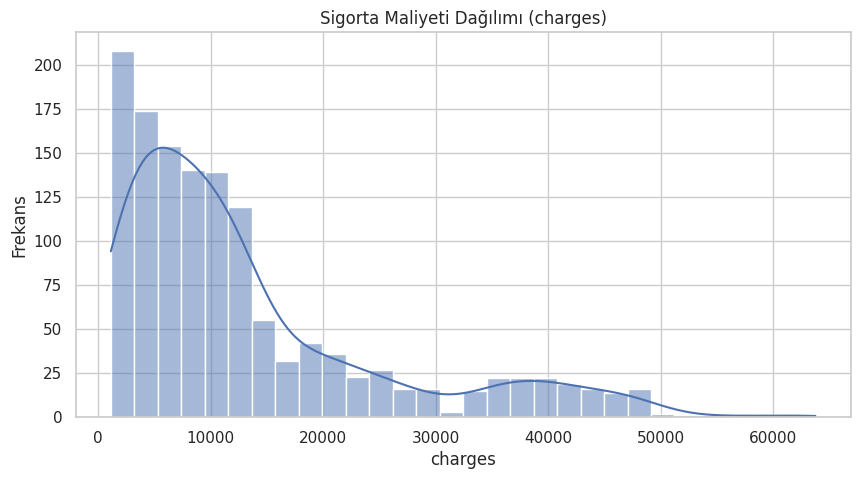

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df["charges"], kde=True, bins=30)
plt.title("Sigorta Maliyeti Dağılımı (charges)")
plt.xlabel("charges")
plt.ylabel("Frekans")
plt.show()


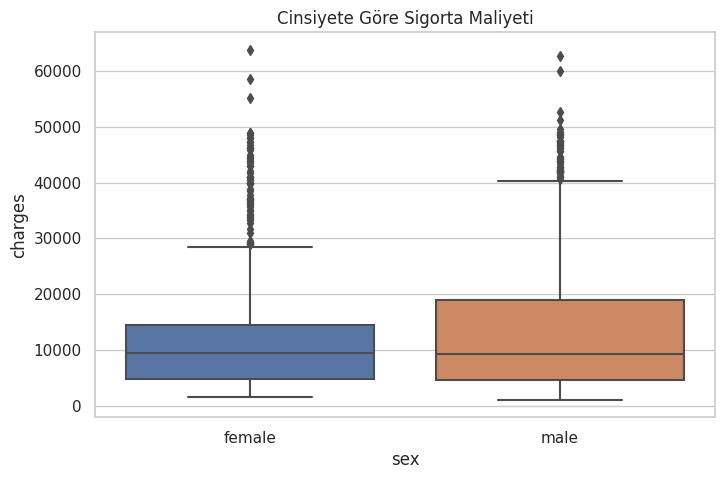

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x="sex", y="charges", data=df)
plt.title("Cinsiyete Göre Sigorta Maliyeti")
plt.show()


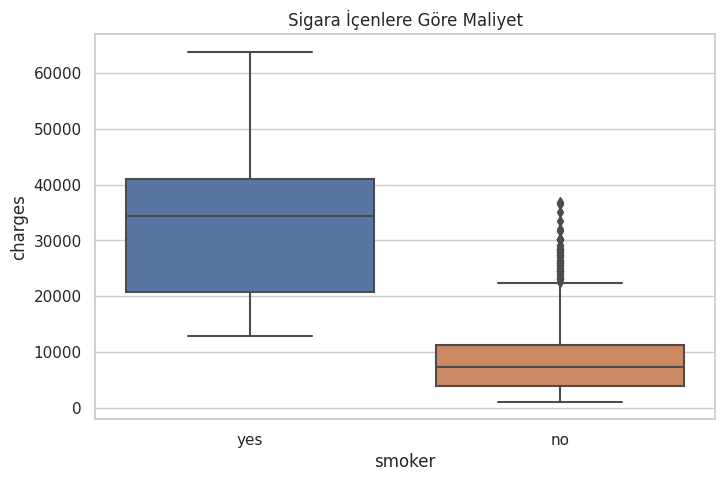

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Sigara İçenlere Göre Maliyet")
plt.show()


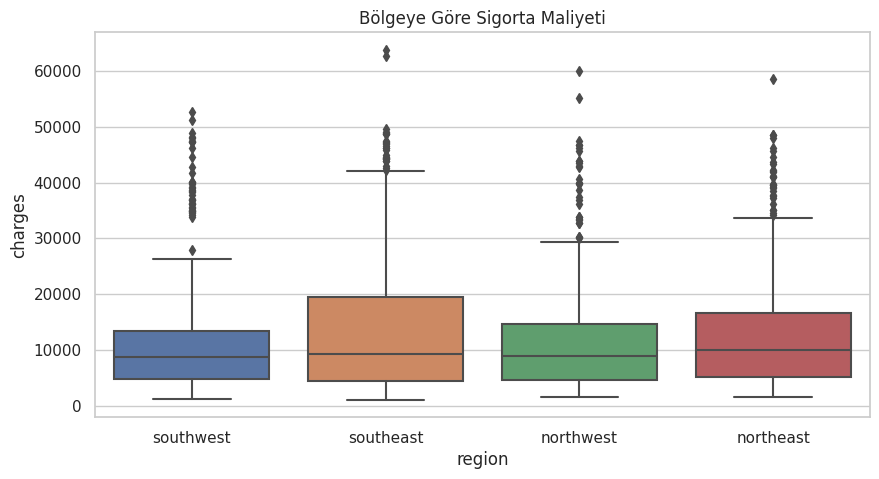

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x="region", y="charges", data=df)
plt.title("Bölgeye Göre Sigorta Maliyeti")
plt.show()


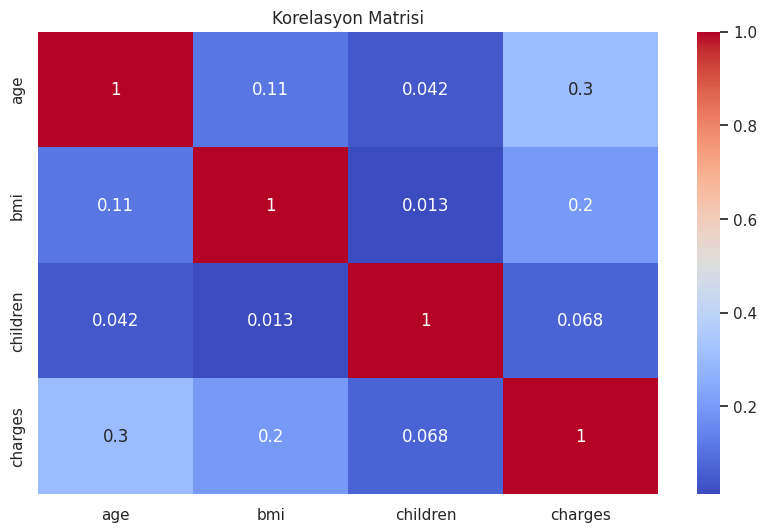

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# LabelEncoder kullan (ikili sütunlar için uygun)
le = LabelEncoder()
df_encoded['sex'] = le.fit_transform(df['sex'])
df_encoded['smoker'] = le.fit_transform(df['smoker'])

# region çok sınıflı -> OneHotEncoder veya pandas get_dummies
df_encoded = pd.get_dummies(df_encoded, columns=['region'], drop_first=True)

df_encoded.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [20]:
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Eğitim veri sayısı:", X_train.shape[0])
print("Test veri sayısı:", X_test.shape[0])


Eğitim veri sayısı: 1070
Test veri sayısı: 268


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))


Linear Regression:
MAE: 4181.194473753652
MSE: 33596915.851361476
RMSE: 5796.284659276274
R² Score: 0.7835929767120722


In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest:
MAE: 2544.977095652368
MSE: 20877104.681165546
RMSE: 4569.147040878149
R² Score: 0.8655247970108418


In [25]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [26]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)

print("XGBoost:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² Score:", r2_score(y_test, y_pred_xgb))


XGBoost:
MAE: 2549.7983490987785
MSE: 21156412.643640805
RMSE: 4599.610053432878
R² Score: 0.8637256972063448


In [ ]:
En iyi performans: RandomForestRegressor

Hem MAE hem RMSE en düşük, R² en yüksek → veriyi en iyi öğrenen model bu olmuş.

XGBoost da benzer performans gösterse de Random Forest bir tık daha önde.



In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Hiperparametreler
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)

# GridSearchCV ile en iyisini ara
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [29]:
print("En iyi parametreler:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("En iyi Random Forest ile:")
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("R² Score:", r2_score(y_test, y_pred_best))


En iyi parametreler: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
En iyi Random Forest ile:
MAE: 2471.3255553479908
RMSE: 4412.946497186943
R² Score: 0.8745619587360917
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_e